#**Churn Risk prediction**


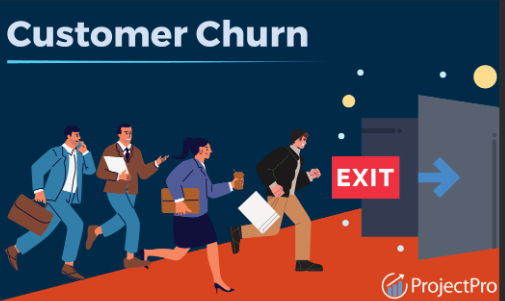

**Problem statement**

No business can thrive without it’s customers. On the flip side, customers leaving the business is a nightmare that every business owner dreads!

In fact, one of the key metrics to measure a business’ success is by measuring its customer churn rate - the lower the churn, the more loved the company is.

Typically, every user of a product or a service is assigned a prediction value that estimates their state of churn at any given time. This value may be based on multiple factors such as the user’s demographic, their browsing behavior and historical purchase data, among other details.

This value factors in unique and proprietary predictions of how long a user will remain a customer and is updated every day for all users who have purchased at least one of the products/services. The values assigned are between 1 and 5.

**Task**

An up-and-coming startup is keen on reducing its customer churn and has hired you as a Machine Learning engineer for this task. As an expert, you are required to build a sophisticated Machine Learning model that predicts the churn score for a website based on multiple features.

**Dataset**

The dataset consists of parameters such as the user’s demographic and PII details, membership account details, duration and frequency of their visits to the website, reported grievances and feedback, and the like.

The benefits of practicing this problem by using Machine Learning techniques are as follows:

This challenge encourages you to apply your Machine Learning skills to build a model that predicts a user’s churn score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df=pd.read_csv('churn_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'churn_train.csv'

In [464]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [465]:
df.shape

(36992, 25)

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [467]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [468]:
df.describe(include='object')

,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,36992,36992,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,fffe4300490044003600300030003800,Pattie Morrisey,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


In [469]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [470]:
df.duplicated().sum()

0

In [471]:
df.isnull().sum()

,0
customer_id,0
Name,0
age,0
gender,0
security_no,0
region_category,5428
membership_category,0
joining_date,0
joined_through_referral,0
referral_id,0


In [472]:
df['gender'].value_counts()

,count
gender,
F,18490
M,18443
Unknown,59


In [473]:
df['used_special_discount'].value_counts()

,count
used_special_discount,
Yes,20342
No,16650


In [474]:
df['internet_option'].value_counts()

,count
internet_option,
Wi-Fi,12413
Mobile_Data,12343
Fiber_Optic,12236


#handle missing data

In [475]:
df.isnull().sum()

,0
customer_id,0
Name,0
age,0
gender,0
security_no,0
region_category,5428
membership_category,0
joining_date,0
joined_through_referral,0
referral_id,0


In [476]:
df['region_category'].value_counts()

,count
region_category,
Town,14128
City,12737
Village,4699


In [477]:
model_region_category=df['region_category'].mode()[0]
df['region_category'].fillna(model_region_category,inplace=True)

In [478]:
model_region_category

'Town'

In [479]:
df[df['preferred_offer_types'].isnull()].head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
94,fffe43004900440034003200320039003100,Kiyoko Varnell,48,M,0FXRTQ3,City,No Membership,2015-03-27,Yes,CID29095,...,960.62,13954.02,17.0,631.15,No,Yes,Yes,Solved,Poor Customer Service,4
241,fffe43004900440035003900380039003400,Millie Pennel,60,M,Q6N9OQO,Town,Gold Membership,2015-11-01,?,CID1942,...,54.08,19078.81,17.0,752.88,Yes,No,Yes,Solved,Poor Website,3
417,fffe43004900440035003500340038003200,Marvella Wetzler,42,M,IOWTJ25,City,No Membership,2016-05-06,?,CID62464,...,1086.01,37893.72,17.0,602.01,Yes,Yes,No,Not Applicable,Too many ads,5
457,fffe43004900440032003300300036003600,Lavern Southwick,49,F,ITDY1DO,Town,Basic Membership,2016-09-18,No,xxxxxxxx,...,31.93,24009.29,6.0,618.05,Yes,No,Yes,No Information Available,Poor Product Quality,5
470,fffe43004900440032003900390034003100,Glendora Bruneau,24,M,VXZV1O3,Village,Platinum Membership,2016-08-17,Yes,CID7943,...,215.35,65188.06,8.0,778.26,No,Yes,No,Not Applicable,Reasonable Price,2


In [480]:
df['preferred_offer_types'].unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

In [481]:
df['preferred_offer_types']=df['preferred_offer_types'].fillna('Unknown')

In [482]:
df[df['points_in_wallet'].isnull()].head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
8,fffe43004900440033003300330032003200,Pattie Helmers,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,...,191.07,18362.31,20.0,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3
13,fffe43004900440033003700320038003200,Jenni Gallaway,34,M,S71G75R,City,Basic Membership,2016-12-07,Yes,CID10856,...,89.76,21318.19,6.0,NaN,No,Yes,No,Not Applicable,Poor Product Quality,4
14,fffe43004900440033003600310031003900,Dorothy Taul,40,M,QAL9ZY2,City,Premium Membership,2016-11-19,No,xxxxxxxx,...,100.59,14842.62,26.0,NaN,No,Yes,No,Not Applicable,Poor Website,3
16,fffe4300490044003100300039003400,Laree Lachowicz,57,F,RZ6TPTR,City,No Membership,2016-01-27,No,xxxxxxxx,...,333.34,47241.32,8.0,NaN,Yes,Yes,Yes,Solved in Follow-up,Too many ads,5


In [483]:
def create_new_fun(value):
    return pd.isnull(value)

df['points_in_wallet_null_values'] = df['points_in_wallet'].apply(create_new_fun)


In [484]:
mean_point=df['points_in_wallet'].mean()
df['points_in_wallet']=df['points_in_wallet'].fillna(mean_point)

In [485]:
df[df['avg_frequency_login_days']=='Error']

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,points_in_wallet_null_values
39,fffe43004900440034003100390036003500,Desire Rieder,49,F,M9F3TE2,Village,Platinum Membership,2017-06-09,Yes,CID18445,...,19062.25,Error,780.580000,Yes,No,No,Not Applicable,Poor Product Quality,3,False
44,fffe4300490044003900300031003500,Pam Seigler,36,M,C7QZITU,Village,Silver Membership,2016-11-28,Yes,CID33962,...,17989.46,Error,686.882199,No,Yes,Yes,Solved,No reason specified,4,True
45,fffe43004900440033003000360031003100,Lore Yarber,12,M,B1XF70C,City,Premium Membership,2017-02-13,No,xxxxxxxx,...,55607.35,Error,686.882199,Yes,No,No,Not Applicable,User Friendly Website,1,True
48,fffe43004900440032003800320037003300,Glendora Borel,30,M,TER02YR,City,Platinum Membership,2015-12-11,?,CID4129,...,86433.91,Error,719.930000,No,Yes,Yes,Unsolved,Reasonable Price,2,False
50,fffe43004900440031003700370031003300,Luisa Allinder,23,M,UAAYTIM,Village,Gold Membership,2015-10-22,Yes,CID24995,...,5136.08,Error,755.220000,No,Yes,No,Not Applicable,Poor Customer Service,-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36960,fffe43004900440031003800370034003500,Palma Dunker,40,F,5AQ78IZ,Town,Basic Membership,2017-11-20,No,xxxxxxxx,...,16361.98,Error,954.137008,No,Yes,No,Not Applicable,Too many ads,4,False
36962,fffe43004900440032003700320032003500,Zoe Andrzejewski,26,M,4318ETP,City,Gold Membership,2017-02-08,No,xxxxxxxx,...,10356.88,Error,693.380000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,4,False
36971,fffe43004900440033003900370033003000,Rasheeda Ramsdell,42,F,OYJ0W89,Town,Premium Membership,2015-02-04,?,CID54811,...,39439.10,Error,1224.393346,Yes,No,Yes,Solved in Follow-up,Too many ads,3,False
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,Town,Basic Membership,2016-09-11,Yes,CID3838,...,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4,False


In [486]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x: 0 if x == 'Error' else x)


In [487]:
df[df['avg_frequency_login_days']=='Error']

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,points_in_wallet_null_values


#**Check Outlear**

In [488]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [489]:
colum=['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet','churn_risk_score']

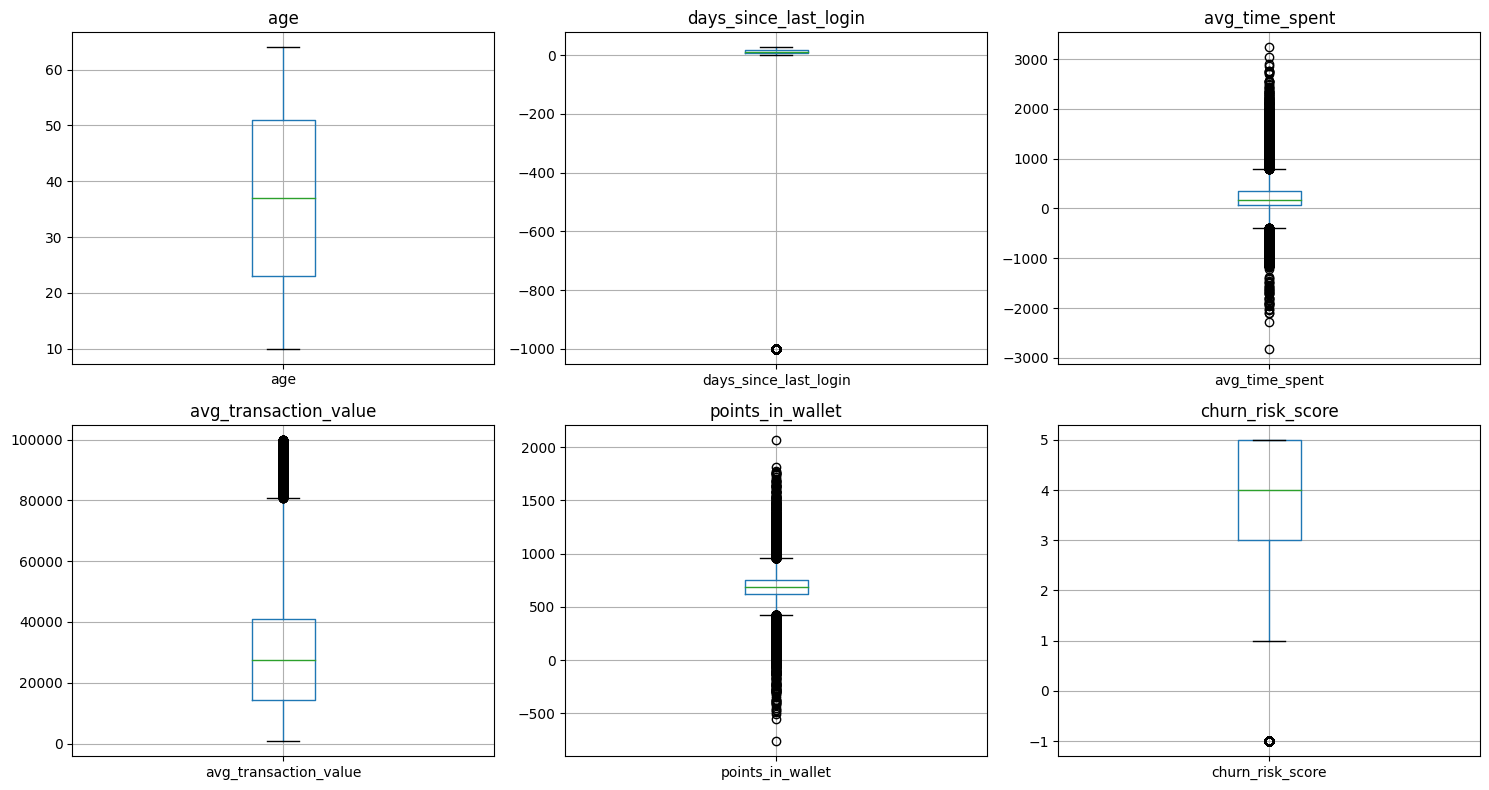

In [490]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
for i, col in enumerate(df[colum]):
    row = i // 3
    col_idx = i % 3
    df[colum].boxplot(column=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)
plt.tight_layout()
plt.show()

In [491]:
df[df['days_since_last_login']<-500]

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,points_in_wallet_null_values
15,fffe43004900440035003100340033003400,Stephane Pullum,16,F,YTBUOEE,Town,Basic Membership,2017-07-09,?,CID35062,...,18792.31,7.0,141.513201,Yes,No,Yes,Unsolved,Too many ads,5,False
57,fffe43004900440035003200350039003200,Jennell Wykoff,40,F,1C5WWL9,Town,Silver Membership,2017-08-21,Yes,CID15992,...,24045.93,8.0,709.730000,No,Yes,No,Not Applicable,Poor Product Quality,3,False
70,fffe43004900440034003600300037003000,Jena Scherrer,59,F,A3SG5HG,Town,No Membership,2017-06-08,Yes,CID8099,...,12556.28,10.0,-44.597633,No,Yes,No,Not Applicable,No reason specified,4,False
74,fffe4300490044003900370038003700,Teri Johanson,53,M,G64J9NC,City,No Membership,2017-04-06,No,xxxxxxxx,...,19233.10,25.0,1032.199126,Yes,No,Yes,Solved,Poor Website,5,False
113,fffe43004900440033003300300032003000,Janell Stackpole,14,M,0ISW03K,Town,Basic Membership,2017-07-19,No,xxxxxxxx,...,32302.27,24.0,520.330000,No,Yes,No,Not Applicable,Poor Customer Service,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36891,fffe43004900440033003700370038003300,Tara Rakestraw,58,F,WTV4V6U,Town,Gold Membership,2015-02-28,No,xxxxxxxx,...,46845.97,16.0,686.882199,No,Yes,Yes,Solved in Follow-up,No reason specified,3,True
36921,fffe43004900440035003700350030003200,Duane Rickman,35,F,65T0DSB,Town,Premium Membership,2016-05-29,?,CID17527,...,36063.43,13.0,1096.844798,Yes,No,No,Not Applicable,No reason specified,3,False
36940,fffe4300490044003900370034003100,Krystin Harsh,61,M,92V71AB,Town,Silver Membership,2015-06-25,No,xxxxxxxx,...,27604.96,16.0,725.240000,Yes,No,Yes,Solved,Poor Customer Service,3,False
36953,fffe43004900440033003700330037003700,Veta Mcfarlin,55,F,4LAU05U,Town,Silver Membership,2016-08-26,Yes,CID42430,...,10060.29,17.0,724.720000,Yes,Yes,No,Not Applicable,Reasonable Price,2,False


In [492]:
df[df['avg_time_spent']<-500][['avg_time_spent','churn_risk_score']]

,avg_time_spent,churn_risk_score
28,-936.744818,4
41,-930.207844,5
60,-615.344319,1
79,-687.629574,4
117,-771.415609,4
...,...,...
36794,-977.809108,-1
36819,-910.568433,3
36956,-746.034591,4
36987,-650.682759,4


In [493]:
df[df['points_in_wallet']<-0]

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,points_in_wallet_null_values
67,fffe43004900440035003200370036003800,Hal Hagood,28,M,DL6BE96,Village,Basic Membership,2017-10-29,No,xxxxxxxx,...,20883.28,14.0,-549.357498,No,Yes,No,Not Applicable,Too many ads,5,False
70,fffe43004900440034003600300037003000,Jena Scherrer,59,F,A3SG5HG,Town,No Membership,2017-06-08,Yes,CID8099,...,12556.28,10.0,-44.597633,No,Yes,No,Not Applicable,No reason specified,4,False
213,fffe43004900440032003100380037003400,Solomon Finnell,42,F,EDXS9Z3,City,Gold Membership,2016-03-28,Yes,xxxxxxxx,...,39667.91,10.0,-38.084314,No,Yes,No,Not Applicable,Poor Product Quality,3,False
340,fffe4300490044003500360031003300,Mara Gourlay,38,F,TEEC4CC,Town,Basic Membership,2015-10-02,?,xxxxxxxx,...,29048.04,21.0,-288.247333,Yes,No,Yes,No Information Available,Poor Product Quality,5,False
625,fffe430049004400380030003400,Elke Montag,40,F,8WQX7CZ,City,Premium Membership,2016-09-09,Yes,CID26330,...,87823.92,16.0,-301.998780,Yes,No,No,Not Applicable,Reasonable Price,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35411,fffe43004900440035003300300033003100,Teri Newbrough,13,M,ZHJK0LM,City,Silver Membership,2017-07-18,No,xxxxxxxx,...,30273.31,7.0,-108.057352,No,Yes,Yes,Solved in Follow-up,Too many ads,3,False
35883,fffe43004900440034003600350035003300,Andrea Sisler,63,M,18UNDO6,Town,Basic Membership,2016-06-06,No,xxxxxxxx,...,46377.80,25.0,-99.476870,Yes,No,Yes,No Information Available,Too many ads,5,False
35943,fffe43004900440034003400300030003600,Hal Sutherlin,27,F,DMRJ6RT,Town,Platinum Membership,2016-09-25,?,CID32336,...,28162.81,12.0,-43.109270,Yes,No,No,Not Applicable,No reason specified,3,False
36414,fffe43004900440035003900320030003300,Necole Merriam,43,M,KKWJCS8,Town,Platinum Membership,2017-01-03,Yes,CID35437,...,868.01,0,-170.497210,Yes,No,No,Not Applicable,No reason specified,3,False


In [494]:
df1=df[colum]

<ipython-input-495-27abf7658be5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df1[i])
<ipython-input-495-27abf7658be5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df1[i])
<ipython-input-495-27abf7658be5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn 

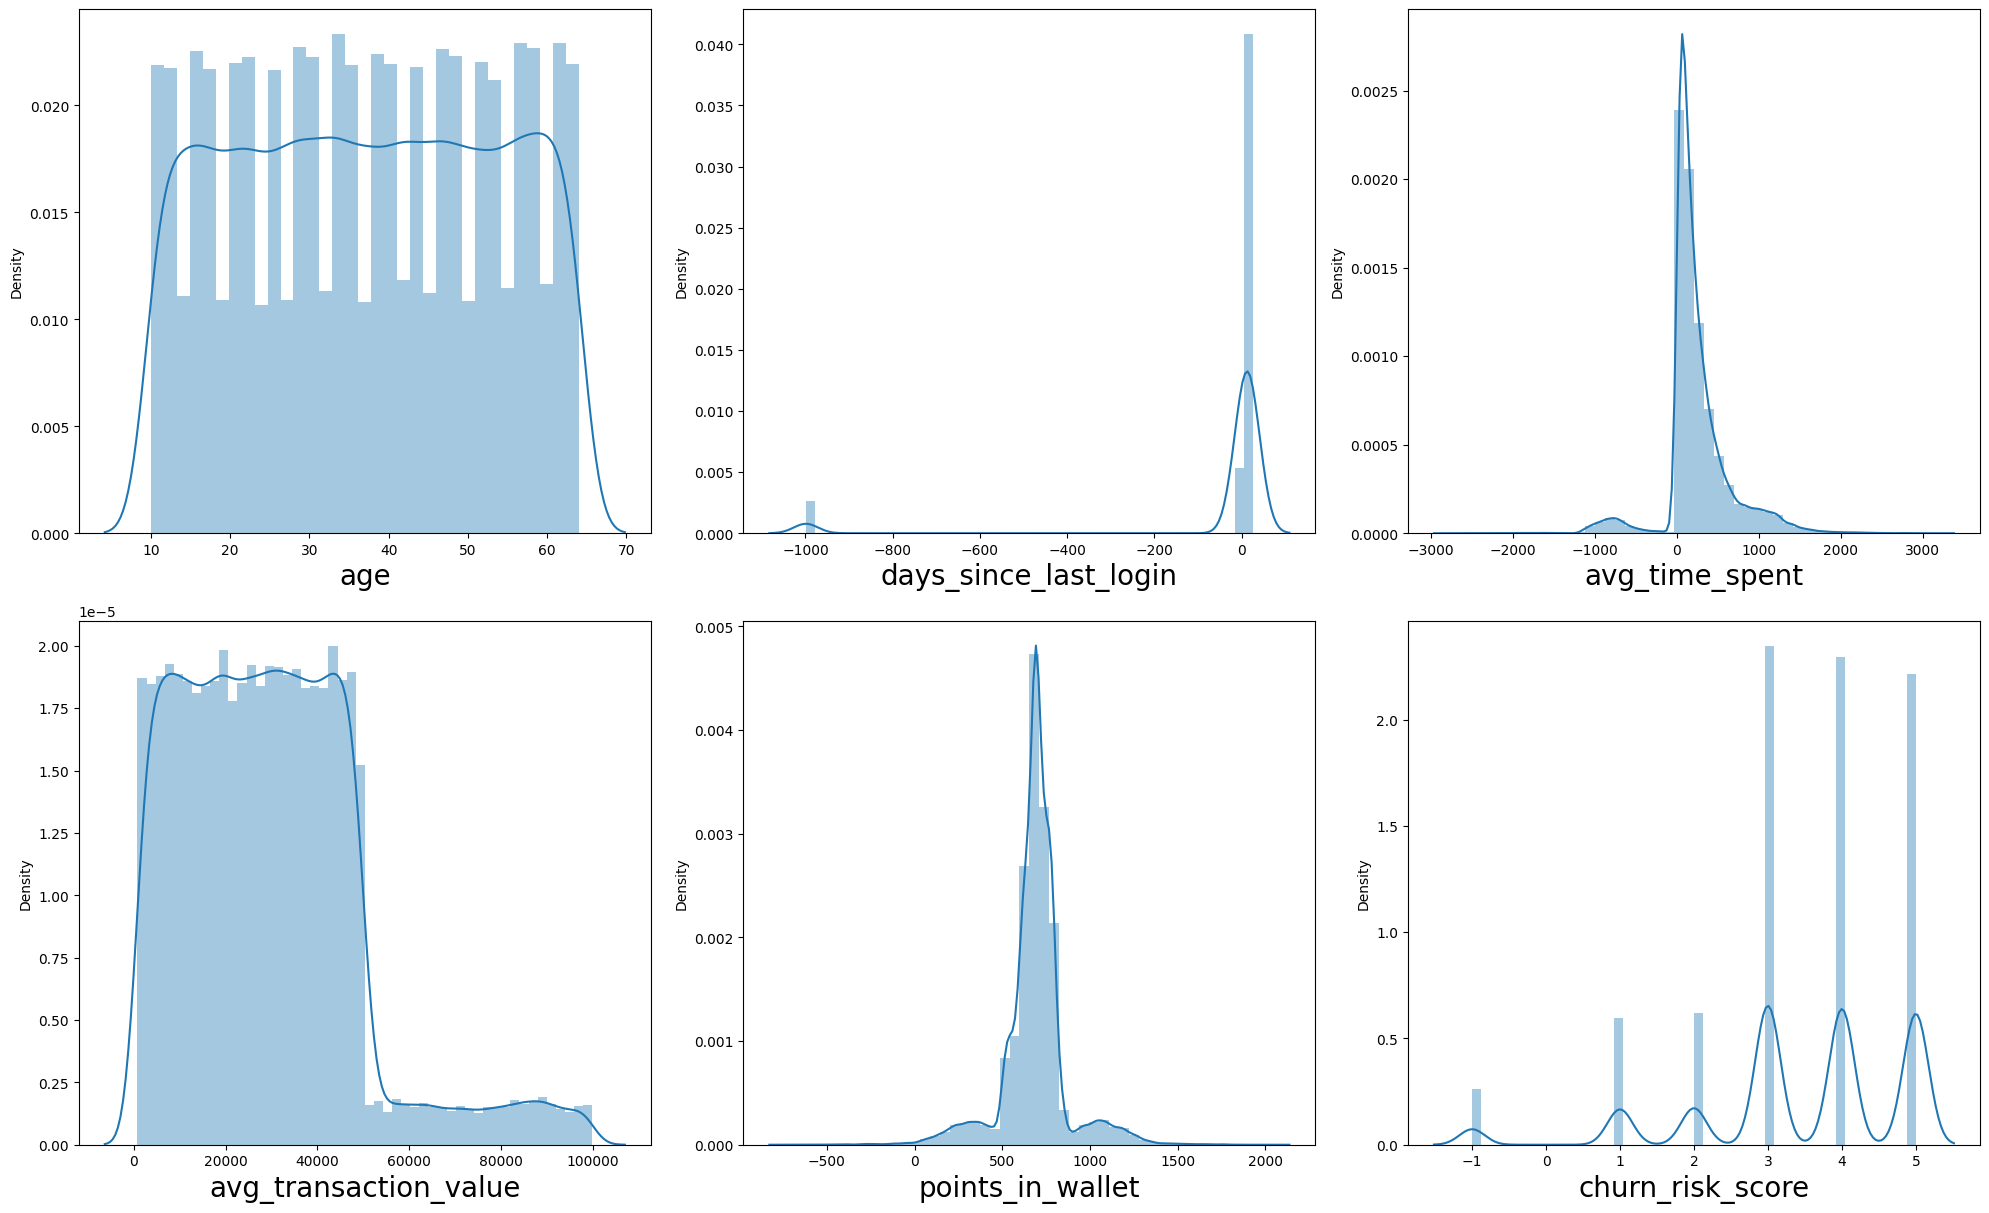

In [495]:
plotnumber=1
plt.figure(figsize=(20,30), facecolor='white')
for i in df1:

        ax = plt.subplot(5,3,plotnumber)
        sn.distplot(df1[i])
        plt.xlabel(i, fontsize=20)
        plotnumber+=1


plt.tight_layout()
plt.show()

In [496]:
df.describe(include='object')

,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,36992,36992,3,36992,3,6,1096,3,11359,4,4,3,30101,1654,2,2,2,5,9
top,fffe4300490044003600300030003800,Pattie Morrisey,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,0,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1,18490,1,19556,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


In [497]:
object_columns=['gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','complaint_status']

In [498]:
df[object_columns]

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,complaint_status
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,Not Applicable
1,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,Solved
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,Solved in Follow-up
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,Unsolved
4,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,Solved
...,...,...,...,...,...,...,...,...
36987,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,No Information Available
36988,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,Not Applicable
36989,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,Unsolved
36990,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,Not Applicable


In [499]:
df2=df[object_columns]

In [500]:
df2

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,complaint_status
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,Not Applicable
1,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,Solved
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,Solved in Follow-up
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,Unsolved
4,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,Solved
...,...,...,...,...,...,...,...,...
36987,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,No Information Available
36988,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,Not Applicable
36989,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,Unsolved
36990,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,Not Applicable


<ipython-input-501-58a01726c6fc>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30,fontsize=15)
<ipython-input-501-58a01726c6fc>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30,fontsize=15)
<ipython-input-501-58a01726c6fc>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30,fontsize=15)
<ipython-input-501-58a01726c6fc>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30,fontsize=15)
<ipython-input-501-58a01726c6fc>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30,fontsize=15)
<ipython-input-501-58a01726c6fc>:8: UserWarning: FixedFormatter should only be used together with FixedLo

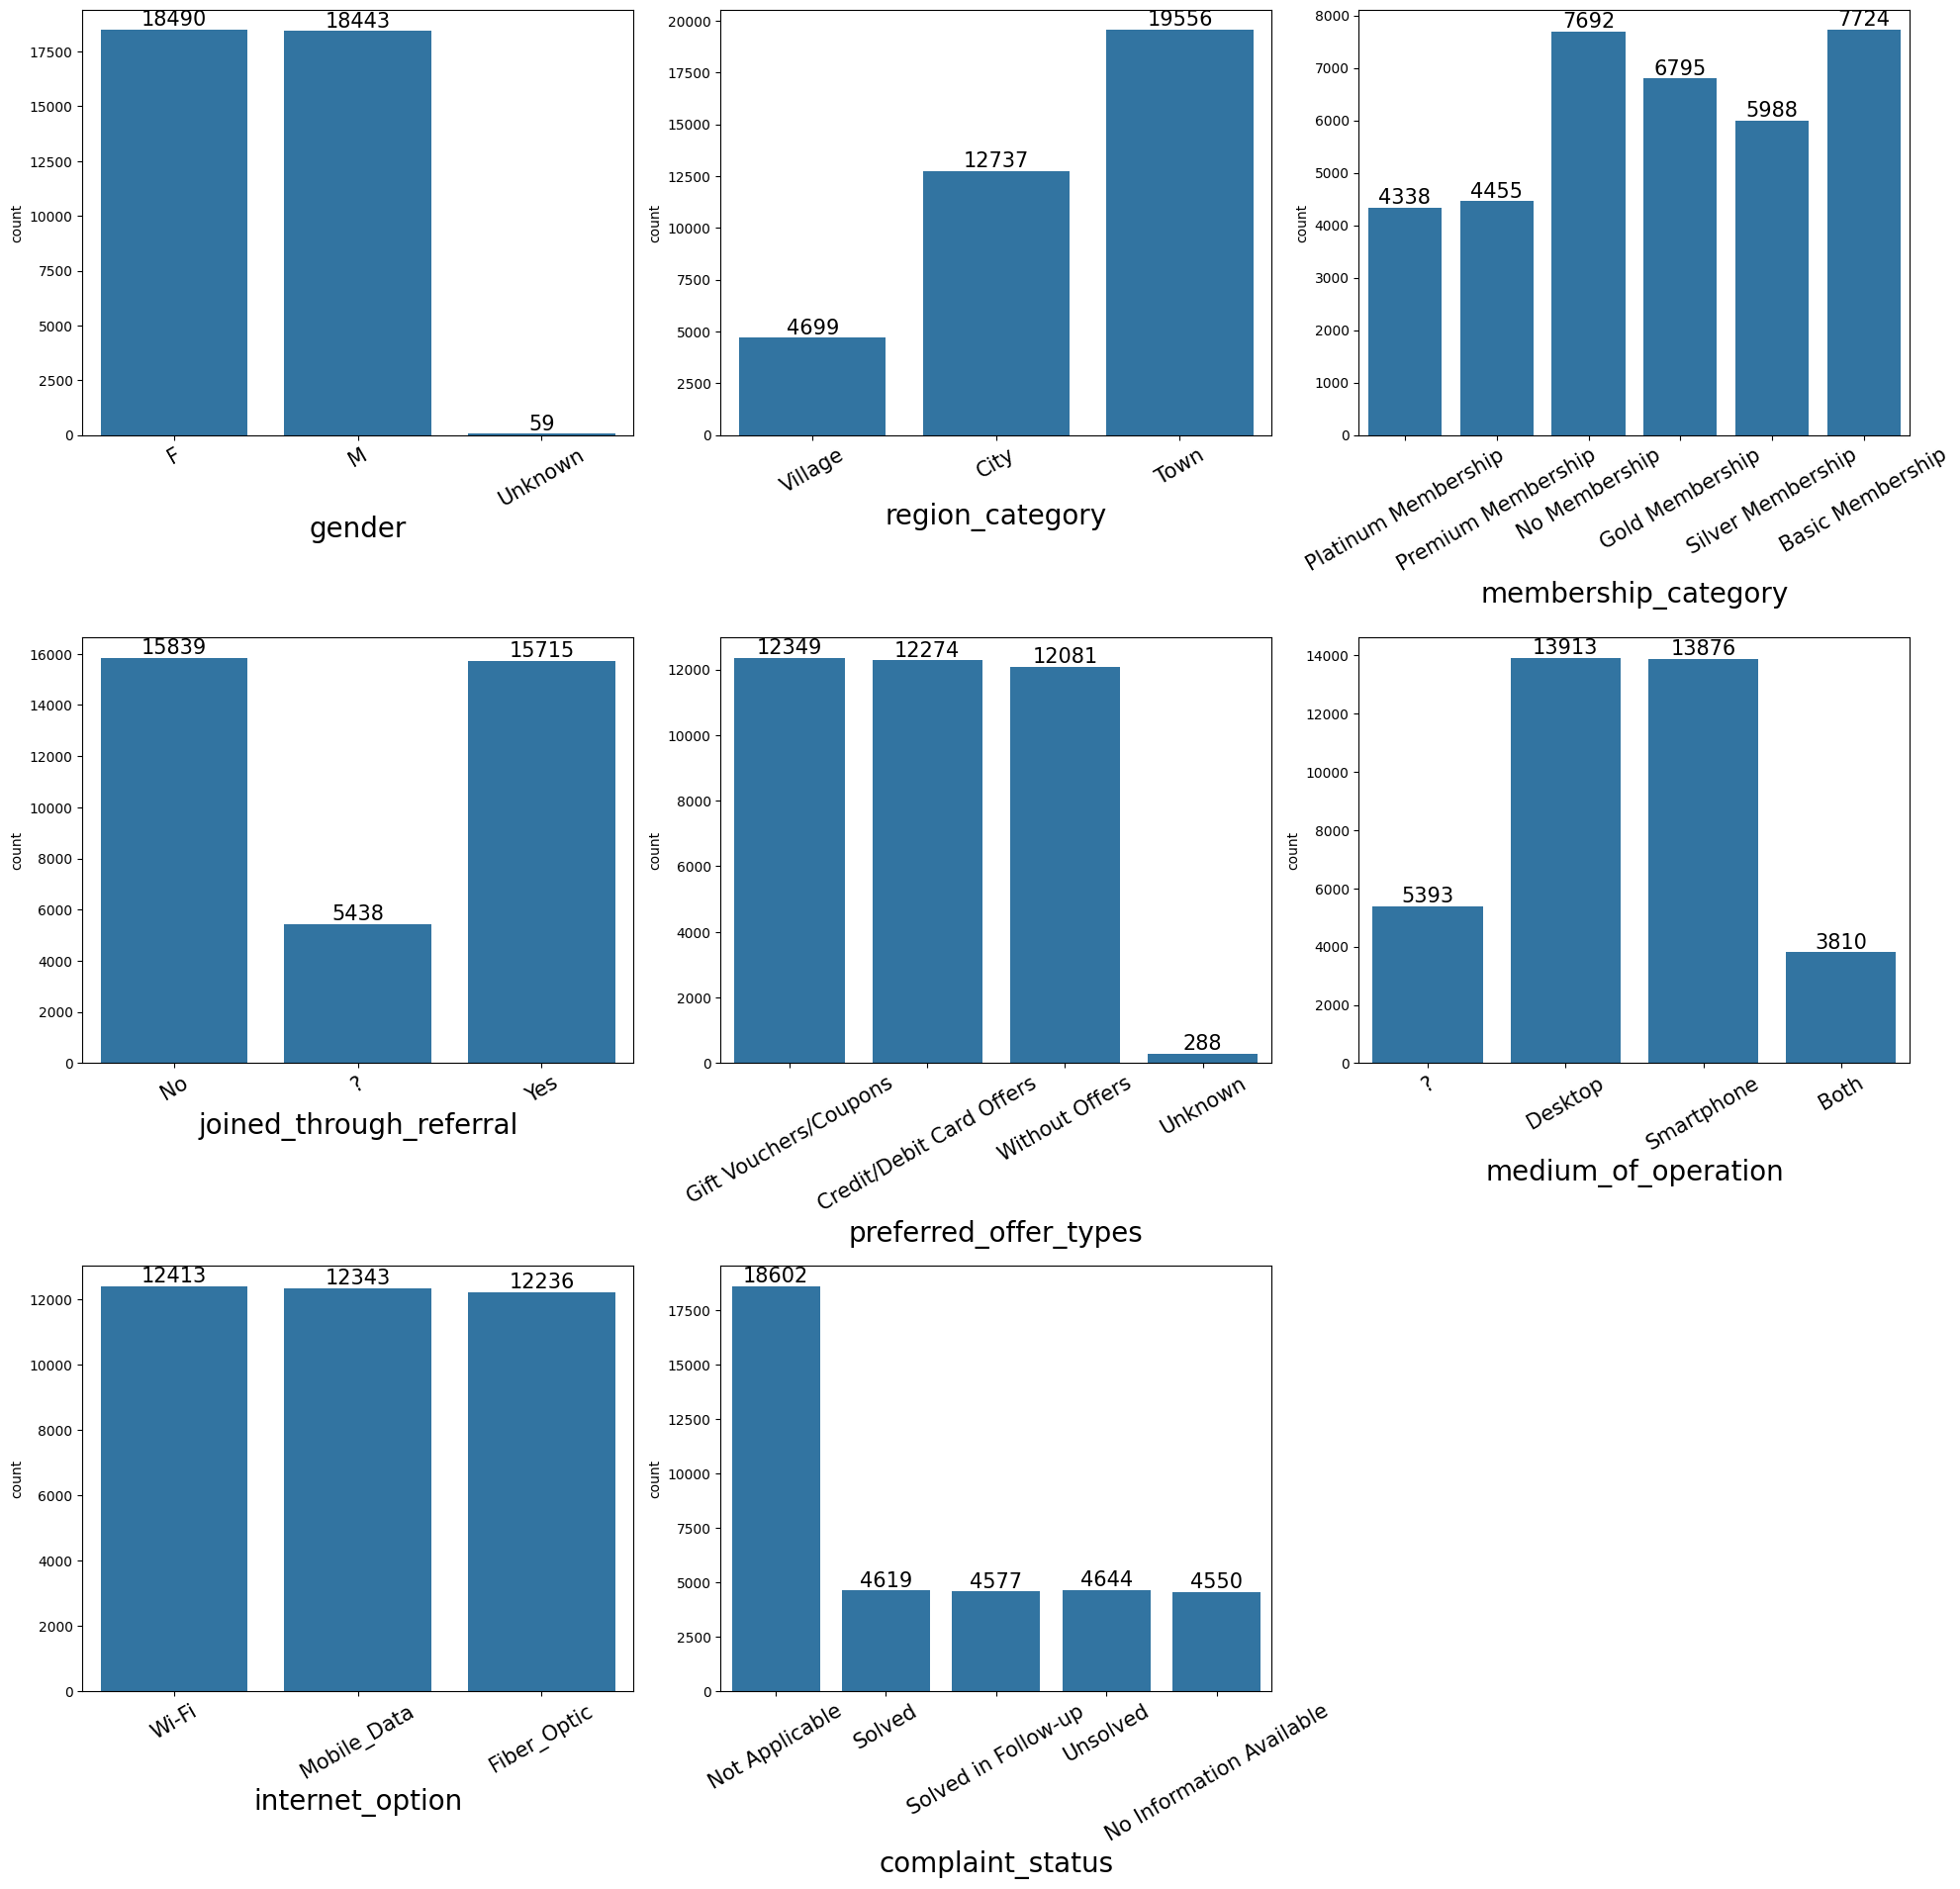

In [501]:
plotnumber=1
plt.figure(figsize=(20,30), facecolor='white')
for i in df2:
  ax = plt.subplot(5,3,plotnumber)
  plt.xlabel(i, fontsize=20)
  sn.countplot(x=df2[i])
  ax.bar_label(ax.containers[0],fontsize=15)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30,fontsize=15)
  plotnumber+=1

plt.tight_layout()
plt.show()

# Work on  joining date

In [502]:
df['joining_date']=pd.to_datetime(df['joining_date'])

In [503]:
df['joining_day'] = df['joining_date'].dt.day
df['joining_month'] = df['joining_date'].dt.month
df['joining_year'] = df['joining_date'].dt.year

In [504]:
df[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = df['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)


In [505]:
df.drop(['joining_date'], axis=1, inplace=True)
df.drop(['last_visit_time'], axis=1, inplace=True)

In [506]:
col=['age',
'days_since_last_login','avg_time_spent','avg_transaction_value',
'points_in_wallet',
'churn_risk_score',
'points_in_wallet_null_values',
'joining_day',
'joining_month',
'joining_year' ,
'last_visit_time_hour',
'last_visit_time_minutes',
'last_visit_time_seconds']

In [507]:
df[col]

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,points_in_wallet_null_values,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,18,17,300.630000,53005.25,781.750000,2,False,17,8,2017,16,8,2
1,32,16,306.340000,12838.38,686.882199,1,True,28,8,2017,12,38,13
2,44,14,516.160000,21027.00,500.690000,5,False,11,11,2016,22,53,21
3,37,11,53.270000,25239.56,567.660000,5,False,29,10,2016,15,57,50
4,31,20,113.130000,24483.66,663.060000,5,False,12,9,2017,15,46,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,2,-650.682759,27277.68,639.510000,4,False,21,9,2017,4,14,5
36988,29,13,-638.123421,11069.71,527.990000,5,False,27,6,2016,23,18,31
36989,23,12,154.940000,38127.56,680.470000,4,False,11,9,2016,3,50,25
36990,53,15,482.610000,2378.86,197.264414,3,False,15,6,2017,9,50,3


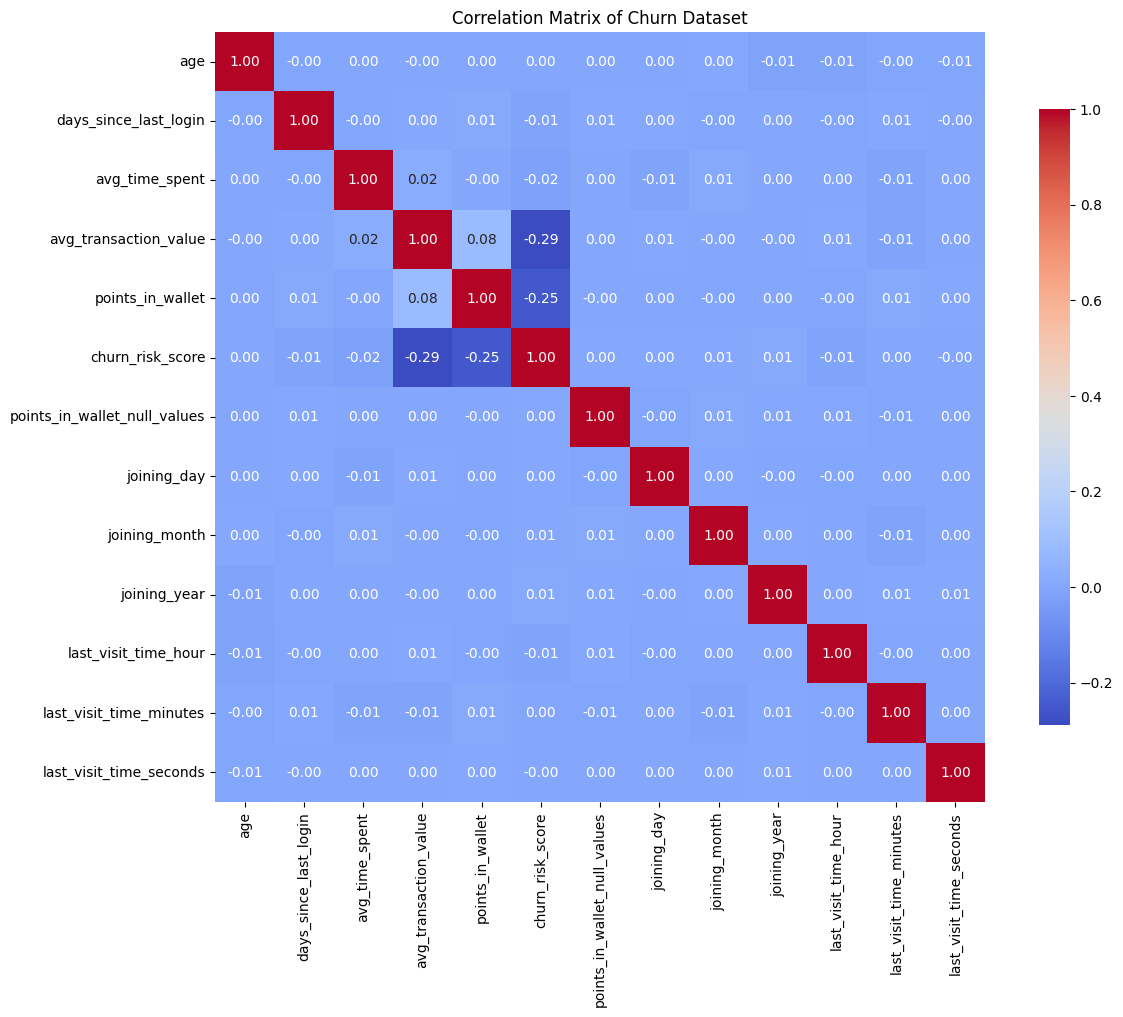

Correlation with Churn Risk Score:
 churn_risk_score                1.000000
joining_year                    0.008856
joining_month                   0.007975
joining_day                     0.003942
points_in_wallet_null_values    0.003731
last_visit_time_minutes         0.002434
age                             0.002360
last_visit_time_seconds        -0.000448
last_visit_time_hour           -0.008596
days_since_last_login          -0.009918
avg_time_spent                 -0.021052
points_in_wallet               -0.252068
avg_transaction_value          -0.288636
Name: churn_risk_score, dtype: float64


In [508]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded=df[col]
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Churn Dataset')
plt.show()

churn_corr = correlation_matrix['churn_risk_score'].sort_values(ascending=False)
print("Correlation with Churn Risk Score:\n", churn_corr)


In [509]:
df_encoded

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,points_in_wallet_null_values,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,18,17,300.630000,53005.25,781.750000,2,False,17,8,2017,16,8,2
1,32,16,306.340000,12838.38,686.882199,1,True,28,8,2017,12,38,13
2,44,14,516.160000,21027.00,500.690000,5,False,11,11,2016,22,53,21
3,37,11,53.270000,25239.56,567.660000,5,False,29,10,2016,15,57,50
4,31,20,113.130000,24483.66,663.060000,5,False,12,9,2017,15,46,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,2,-650.682759,27277.68,639.510000,4,False,21,9,2017,4,14,5
36988,29,13,-638.123421,11069.71,527.990000,5,False,27,6,2016,23,18,31
36989,23,12,154.940000,38127.56,680.470000,4,False,11,9,2016,3,50,25
36990,53,15,482.610000,2378.86,197.264414,3,False,15,6,2017,9,50,3
